In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score,roc_auc_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df = df.head(5000)

In [3]:
df = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [5]:
df.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,1.969800,0.115600,0.014800,0.207200,1.772000,0.093800,0.602000
std,0.498415,1.566326,0.444833,0.122409,0.612489,13.545358,0.292948,0.823245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


In [6]:
df.describe(exclude='number')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5000,5000,4998,5000,5000,5000,5000,5000
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5000,3418,3174,2156,3657,3167,4461,3699


In [7]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

**dapat dilihat bahwa dalam data ada 2 missing value di kolom "country" karna hanya ada 2 missing value dari 5000 baris dataset, saya memutuskan untuk menghapus baris yang memiliki missing value karna menurut saya tidak terlalu berpengaruh terhadap data yg dimiliki**

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        4998 non-null   object 
 1   is_canceled                  4998 non-null   int64  
 2   adults                       4998 non-null   int64  
 3   children                     4998 non-null   float64
 4   babies                       4998 non-null   int64  
 5   meal                         4998 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               4998 non-null   object 
 8   distribution_channel         4998 non-null   object 
 9   reserved_room_type           4998 non-null   object 
 10  booking_changes              4998 non-null   int64  
 11  deposit_type                 4998 non-null   object 
 12  days_in_waiting_list         4998 non-null   int64  
 13  customer_type     

## EDA

In [9]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


In [10]:
df['is_canceled'].value_counts()

0    2701
1    2297
Name: is_canceled, dtype: int64

In [11]:
df['hotel'].value_counts()

Resort Hotel    4998
Name: hotel, dtype: int64

In [12]:
df['reserved_room_type'].value_counts()

A    3166
D     847
E     540
G     169
C     109
F     101
H      63
L       3
Name: reserved_room_type, dtype: int64

In [13]:
df['customer_type'].value_counts()

Transient          3697
Transient-Party    1057
Contract            219
Group                25
Name: customer_type, dtype: int64

In [14]:
df['distribution_channel'].value_counts()

TA/TO        3656
Direct       1067
Corporate     275
Name: distribution_channel, dtype: int64

In [15]:
df['deposit_type'].value_counts()

No Deposit    4459
Non Refund     477
Refundable      62
Name: deposit_type, dtype: int64

In [16]:
df['market_segment'].value_counts()

Online TA        2156
Groups           1025
Offline TA/TO     928
Direct            617
Corporate         261
Complementary      11
Name: market_segment, dtype: int64

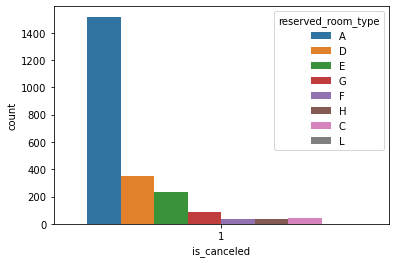

In [17]:
canceled = df[df['is_canceled'] == 1]
sns.countplot(data = canceled,x='is_canceled',hue='reserved_room_type')

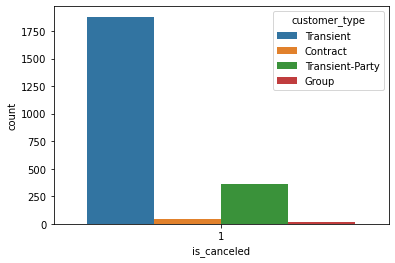

In [18]:
canceled = df[df['is_canceled'] == 1]
sns.countplot(data = canceled,x='is_canceled',hue='customer_type')

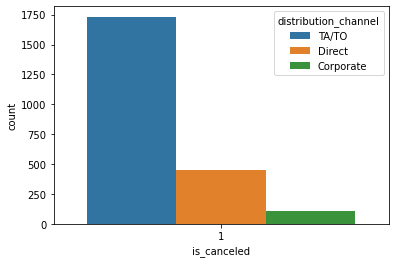

In [19]:
canceled = df[df['is_canceled'] == 1]
sns.countplot(data = canceled,x='is_canceled',hue='distribution_channel')

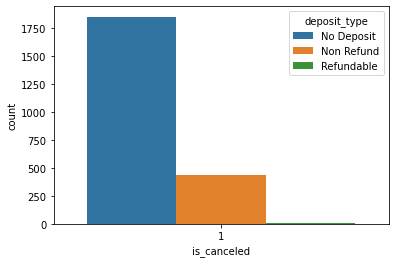

In [20]:
canceled = df[df['is_canceled'] == 1]
sns.countplot(data = canceled,x='is_canceled',hue='deposit_type')

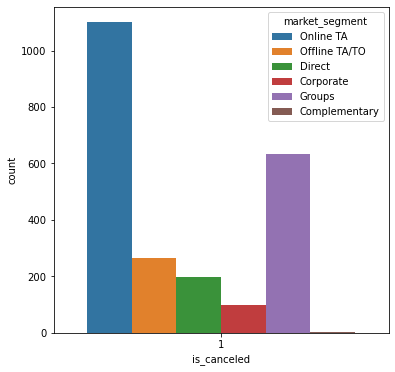

In [21]:
plt.figure(figsize = (6,6))
canceled = df[df['is_canceled'] == 1]
sns.countplot(data = canceled,x='is_canceled',hue='market_segment')

Dari kelima grafik diatas dapat diambil beberapa kesimpulan yaitu:
- customer yang paling banyak membatalkan pesanan hotel yaitu customer yang memesan kamar tipe A
- tipe customer yang paling banyak membatalkan pesanan hotel yaitu tipe customer _Transcient_
- pesanan yang paling banyak dibatalkan yaitu pemesanan yang dilakukan melalui _Travel Agents & Tour Operators_
- customer yang tidak melakukan deposit terlebih dahulu paling banyak membatalkan pesanan hotel
- customer yang paling banyak membatalkan pesanan berasal dari segmen pasar _Online Travel Agents & Groups_ 

## Data Cleaning & Preprocessing

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
df['hotel'].value_counts()

Resort Hotel    4998
Name: hotel, dtype: int64

In [24]:
df['country'].value_counts()

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
DEU      89
NLD      55
CN       33
BEL      29
POL      28
USA      28
CHE      26
RUS      23
ITA      23
BRA      18
AUT      12
ROU      12
LUX      10
FIN       9
SWE       8
DNK       6
LVA       6
ARG       6
CHN       5
NOR       5
AUS       4
KOR       3
IND       3
CZE       3
LTU       3
OMN       2
CHL       2
MAR       2
MEX       2
CRI       2
MOZ       2
SVN       2
ZAF       2
EST       2
DZA       2
TUR       2
GRC       1
BLR       1
SMR       1
SRB       1
AGO       1
ALB       1
PRI       1
ZMB       1
HUN       1
ISR       1
CYM       1
CPV       1
BWA       1
UKR       1
ZWE       1
Name: country, dtype: int64

Karena kolom hotel hanya memiliki satu nilai dan kolom hotel memiliki terlalu banyak nilai kategori maka saya lakukan drop pada kolom hotel dan country

In [25]:
df = df.drop(columns = ['hotel','country'], axis = 1)

In [26]:
df

,is_canceled,adults,children,babies,meal,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,0,1,0.0,0,BB,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,0,1,0.0,0,BB,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,0,2,0.0,0,BB,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,2,0.0,0,HB,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,1,2,0.0,0,HB,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,1,2,0.0,0,HB,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,1,2,0.0,0,HB,Groups,Direct,A,0,Non Refund,0,Transient,0,0


Skema Preprocessing:
* saya melakukan One Hot Encoding pada fitur : meal, market_segment, distribution_channel, deposit_type, customer_type karna skala pengukuran dari data tersebut apabila dirubah menjadi numerik maka akan maka akan memiliki skala pengukuran nominal(tidak memiliki tingkatan)
* sedangkan untuk fitur reserved_room_type saya melakukan Ordinal Encoder karna skala pengukurannya memiliki tipe integer ordnal(memiliki tingkatan) apabila data kategorinya dirubah menjadi numerik 

In [27]:
import category_encoders as ce

In [28]:
ordinal_mapping = [
{'col':'reserved_room_type','mapping':{None:0,'A':1,'D':2, 'E':3, 'G':4, 'F':5, 'H': 6, 'C':7, 'L':8}}
]

In [35]:
transformer= ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'),['meal','market_segment','distribution_channel','deposit_type','customer_type']),
    ('ordinal',ce.OrdinalEncoder(mapping=ordinal_mapping),['reserved_room_type'])],remainder='passthrough')

### Data Splitting

In [36]:
df.head()

,is_canceled,adults,children,babies,meal,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,0,1,0.0,0,BB,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,0,1,0.0,0,BB,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,0,2,0.0,0,BB,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [37]:
x=df.drop(['is_canceled'],axis=1)
y=df['is_canceled']

In [38]:
x_train,x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=2020)

### Data Transformation

In [39]:
x_train_preprocessed = transformer.fit_transform(x_train)
x_test_preprocessed = transformer.transform(x_test)

In [40]:
x_train_preprocessed = pd.DataFrame(x_train_preprocessed)
x_test_preprocessed = pd.DataFrame(x_test_preprocessed)
x_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
3744,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
3746,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
x_test_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1247,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Selection : Benchmark

In [62]:
x_train_val,x_test, y_train_val, y_test= train_test_split(x, y, stratify=y, test_size= 0.2, random_state=2020)

In [63]:
logreg= LogisticRegression()
tree= DecisionTreeClassifier(max_depth=3)
knn= KNeighborsClassifier()

Dalam kasus pemesanan hotel kesalahan yang akan pihak hotel ingin mengurangi user yang dprediksi tdk membatalkan pesanan padahal sebenarnya user membatalkan pesanan **(FN)**, maka metric evaluasi yang dipakai adalah **_Recall_**

In [64]:
tree_pipe=Pipeline([
    ('transformer', transformer),
    ('tree',tree)
])

logreg_pipe=Pipeline([
    ('transformer', transformer),
    ('logreg',logreg)
])

knn_pipe=Pipeline([
    ('transformer', transformer),
    ('knn',knn)
])

In [66]:
tree_cv=cross_val_score(tree_pipe, x_train_val,y_train_val, scoring='neg_mean_squared_error')
print(tree_cv)

[-0.3325     -0.27625    -0.3225     -0.31163955 -0.30663329]


In [67]:
print('mean score', tree_cv.mean())
print('std score', tree_cv.std())

mean score -0.3099045682102628
std score 0.019055391948611874


In [68]:
logreg_cv=cross_val_score(logreg_pipe,x_train_val,y_train_val, scoring='neg_mean_squared_error')
logreg_cv

array([-0.2925    , -0.27625   , -0.2925    , -0.3028786 , -0.27158949])

In [69]:
print('mean score', logreg_cv.mean())
print('std score', logreg_cv.std())

mean score -0.28714361702127655
std score 0.011537531524147038


In [70]:
knn_cv=cross_val_score(knn_pipe,x_train_val,y_train_val, scoring='neg_mean_squared_error')
knn_cv

array([-0.32875   , -0.26875   , -0.2875    , -0.28660826, -0.281602  ])

In [71]:
print('mean score', knn_cv.mean())
print('std score', knn_cv.std())

mean score -0.2906420525657071
std score 0.02019576243914553


Sebagai Benchmark, terpilih model **Logistic Regresi** karena mse dan nilai standar deviasinya paling kecil diantara ketiga model diatas

### Model Performance in Test Set

In [73]:
model= LogisticRegression(solver='liblinear')

In [77]:
estimator= Pipeline([
    ('preprocessing', transformer),
    ('model',logreg)
])

In [78]:
estimator.fit(x_train_val,y_train_val)
y_pred=estimator.predict(x_test)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       540
           1       0.65      0.64      0.64       460

    accuracy                           0.68      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.68      0.67      1000



In [84]:
recall_score(y_test,y_pred)

0.6369565217391304

## Hyperparameter Tunning

In [89]:
model= LogisticRegression(solver='liblinear')
estimator= Pipeline([
    ('preprocessing', transformer),
    ('model',logreg)
])

In [90]:
hyperparam_space={
    'model__solver':['liblinear', 'newton-cg'],
    'model__C':[100,10,1,0.1,0.01,0.001]
}

In [91]:
skfold=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='recall'
    ,n_jobs=-1
    )

In [92]:
grid_search.fit(x_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                

In [93]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.7158408363937923
best param {'model__C': 100, 'model__solver': 'liblinear'}


## Before Tunning vs After Tunning

In [95]:
model= LogisticRegression(solver='liblinear')
estimator= Pipeline([
    ('preprocessing', transformer),
    ('model',logreg)
])
estimator.fit(x_train_val,y_train_val)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['meal', 'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'mapping': {None: 0,
                                                                                       'A': 1,
                                                                                       'C': 7,
                          

### Before Tunning

In [96]:
y_pred=estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       540
           1       0.65      0.64      0.64       460

    accuracy                           0.68      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.68      0.67      1000



In [97]:
recall_score(y_test,y_pred)

0.6369565217391304

### After Tunning

In [98]:
grid_search.best_estimator_.fit(x_train_val,y_train_val)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['meal', 'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'mapping': {None: 0,
                                                                                       'A': 1,
                                                                                       'C': 7,
                          

In [100]:
y_pred=grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       540
           1       0.65      0.64      0.64       460

    accuracy                           0.68      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.68      0.67      1000



In [101]:
recall_score(y_test,y_pred)

0.6369565217391304

**Tidak Ada Perubahan score dari model setelah dilakukan hyperparameter tunning, jadi tidak perlu dilakukan hyperparameter tunning**